### Introduction

In the following notebook, I will be conducting a market analysis where I intend to look into the impact of COVID 19 

**Read in libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\kishe\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Set notebook preferences**

In [2]:
#Set pandas preferences
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
#pd.options.display.float_format = '{:.2f}'.format

#Set visualization preferences
plt.style.use('Solarize_Light2')

#Set path to save visualizations
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Visualizations\Modeling'

**Read in data**

In [3]:
#Set path to local machine
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Data\02_Cleaned'

#Read in file
df = pd.read_csv(path + '/2020_0715_Listings_Cleaned.csv', 
                parse_dates=['last_review'])

#Sort data
df.sort_values('last_review', inplace = True)

### Data Overview

**Preview Data**

In [4]:
#Display data, print shape
print('Data shape:', df.shape)
display(df.head(3))

Data shape: (126258, 48)


,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cancellation_policy,city,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_name,host_response_rate,host_response_time,host_verifications,id,instant_bookable,is_location_exact,last_review,latitude,longitude,maximum_nights,minimum_nights,monthly_price,neighbourhood_cleansed,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_rating,reviews_per_month,room_type,security_deposit,weekly_price,zipcode
58140,1,"Wifi,Kitchen, Free street parking , Hot tub ,...",21,335,30,60,1.0,Real Bed,1.0,1.0,4,NaN,NaN,moderate,San Francisco,30.0,0.0,1,1.0,73070632,0.0,0.0,Tina,87.0,within a few hours,"email , phone , reviews , jumio , offlin...",18546459,0,1,2018-07-01,37.710475,-122.449333,1125,6,NaN,Outer Mission,7,45.0,Condominium,0,0,1,97.0,0.57,Private room,100.0,NaN,94112.0
22134,2,"TV, Cable TV ,Wifi,Kitchen, Free parking on p...",0,324,19,49,1.0,Real Bed,1.0,1.0,33,NaN,NaN,strict 14 with grace period,San Francisco,200.0,0.0,1,1.0,13832870,0.0,0.0,International,2.0,within an hour,"phone , reviews , jumio , offline governm...",18874655,0,1,2018-07-01,37.802900,-122.419981,1125,30,NaN,Russian Hill,2,148.0,Apartment,0,0,1,100.0,0.18,Entire home/apt,1500.0,NaN,94133.0
119267,2,"TV, Cable TV ,Wifi,Kitchen, Free parking on p...",29,364,59,89,1.0,Real Bed,1.0,1.0,32,NaN,NaN,strict 14 with grace period,San Francisco,200.0,0.0,1,1.0,13832870,0.0,0.0,International,96.0,within a few hours,"phone , reviews , jumio , offline governm...",18874655,0,1,2018-07-01,37.802900,-122.419981,1125,30,NaN,Russian Hill,2,144.0,Apartment,0,0,1,100.0,0.24,Entire home/apt,1500.0,NaN,94133.0


# COVID 19 Impact Analysis

**Prepare data**

In [5]:
#Split last review into month - day col
df[['year','month_day']] = df['last_review'].astype(str).str.split('-',1,expand=True)

#Check
df.iloc[:,-5:].head()

,security_deposit,weekly_price,zipcode,year,month_day
58140,100.0,NaN,94112.0,2018,07-01
22134,1500.0,NaN,94133.0,2018,07-01
119267,1500.0,NaN,94133.0,2018,07-01
58041,250.0,NaN,94103.0,2018,07-01
58040,0.0,NaN,94131.0,2018,07-01


## How did shutdown on 3/19/2020 Impact Airbnb Market in San Francisco?

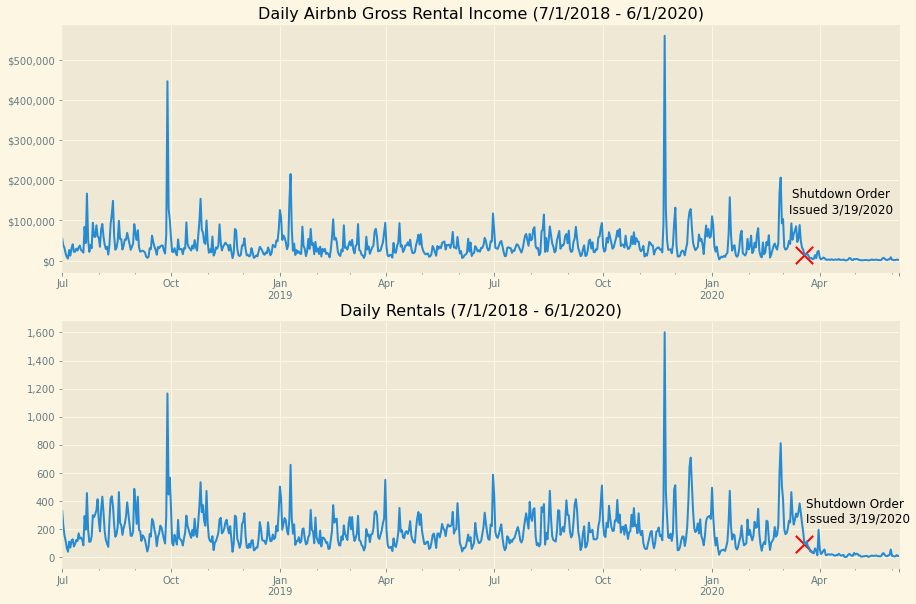

In [6]:
#Get daily gross rental income and counts of bookings
daily_gross = df.groupby('last_review')['price'].agg({'sum','count'})

#Create fig
f, ax = plt.subplots(2,1,figsize = (15,10))

#Plot total revenue each day
daily_gross['sum'].plot(ax=ax[0])
ax[0].scatter('2020-03-19', 14443, color = 'red',  marker='x',s=300,  edgecolors='black',
)

#Set plot aesthetics
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
ax[0].set_xlabel('')
ax[0].set_title('Daily Airbnb Gross Rental Income (7/1/2018 - 6/1/2020)')
ax[0].text('2020-04-19', 120_000, 'Shutdown Order\nIssued 3/19/2020', fontsize=12,horizontalalignment='center',);


#Plot total revenue each day
daily_gross['count'].plot(ax=ax[1])

#Add text for Shut down
X='2020-03-19'
Y = daily_gross['count'].iloc[daily_gross.index == '2020-03-19']
ax[1].scatter(X,Y, color = 'red',  marker='x',s=300,  edgecolors='black')

#Set plot aesthetics
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax[1].set_xlabel('')
ax[1].set_title('Daily Rentals (7/1/2018 - 6/1/2020)')

ax[1].text('2020-03-20' ,Y + 155, 'Shutdown Order\nIssued 3/19/2020', fontsize=12,horizontalalignment='left',);

#Save to Visualizations file
plt.savefig(eda_path + '/covid_timeseries.png', bbox_inches='tight')

**Impact of COVID - Comparing post 3/19/2020 shutdown to 2019 Numbers

In [7]:
#Capture 2020 daily gross income data after shutdown. Capture 2019 daily gross income data for year prior
shutdown_impact = pd.DataFrame({'daily_gross_2020': daily_gross.iloc[627:]['sum'].values, 'daily_gross_2019': daily_gross.iloc[261:342]['sum'].values},
                              daily_gross.iloc[627:].index)
shutdown_impact['net_loss'] = shutdown_impact.iloc[:,0] - shutdown_impact.iloc[:,1]

#Capture total loss and percent loss during this period
total_loss = np.sum(shutdown_impact.net_loss)
loss_percentage = np.sum(shutdown_impact.net_loss)/np.sum(shutdown_impact.daily_gross_2019)

#check
display(shutdown_impact.head())

,daily_gross_2020,daily_gross_2019,net_loss
last_review,,,
2020-03-19,14443.0,25678.0,-11235.0
2020-03-20,15115.0,33063.0,-17948.0
2020-03-21,16617.0,36958.0,-20341.0
2020-03-22,14289.0,72459.0,-58170.0
2020-03-23,8731.0,79241.0,-70510.0


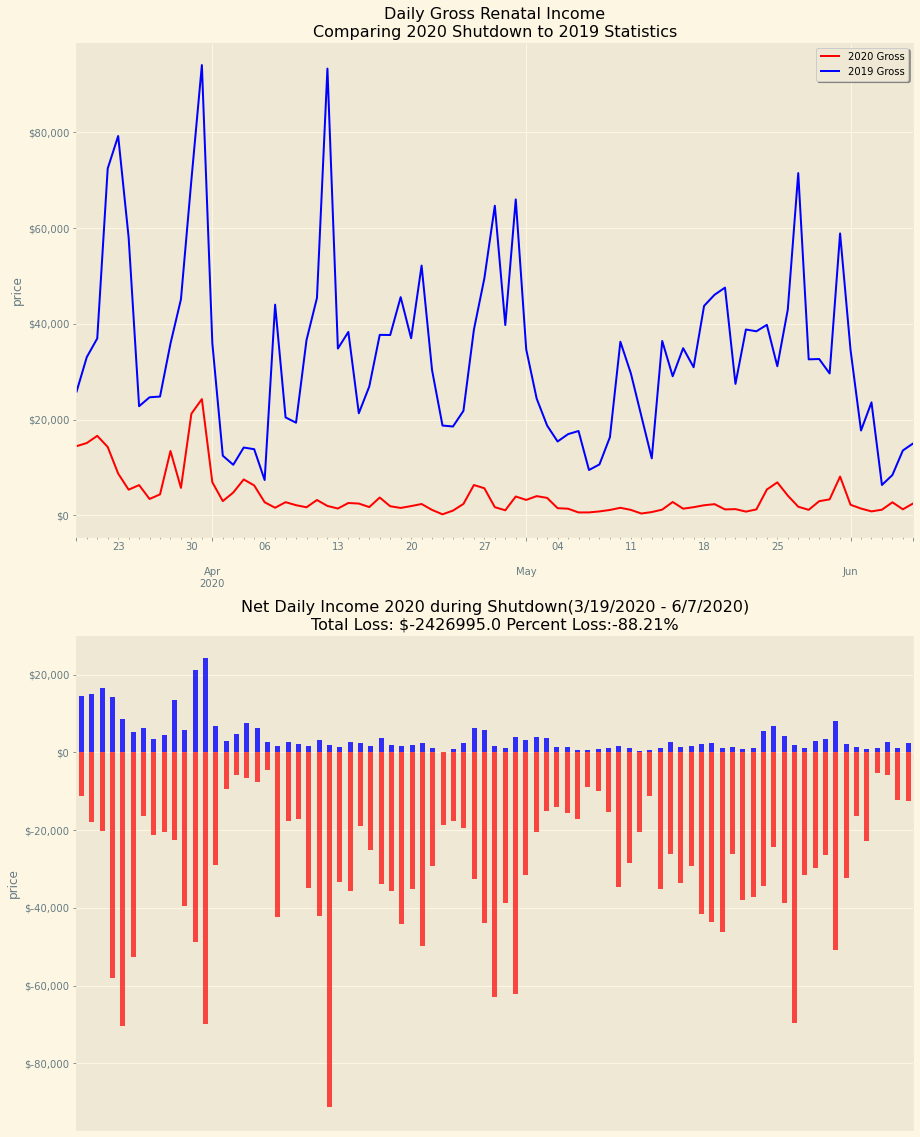

In [8]:
#Create figure
f, ax = plt.subplots(2,1, figsize = (15,20))

#Plot time series trend of shutdown and 2019 statistics
shutdown_impact[['daily_gross_2020','daily_gross_2019']].plot(ax=ax[0], color = ['red','blue'])

#Set ax[0]plot aesthetics
ax[0].set_title('Daily Gross Renatal Income\nComparing 2020 Shutdown to 2019 Statistics')
ax[0].set_xlabel('')
ax[0].set_ylabel('price')
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
ax[0].legend(['2020 Gross','2019 Gross'],frameon = True, shadow=True)

#Plot losses 
shutdown_impact.net_loss.plot(kind = 'bar', ax=ax[1], color = 'r', alpha = .7)
shutdown_impact.daily_gross_2020.plot(kind = 'bar', ax=ax[1], color ='b',alpha = .8)

#Set ax[1] plot aesthetics
ax[1].set_title('Net Daily Income 2020 during Shutdown(3/19/2020 - 6/7/2020)\nTotal Loss: ${} Percent Loss:{}%'.format(
                    round(total_loss,2), round(loss_percentage,4) * 100))
ax[1].set_xlabel('')
ax[1].tick_params(axis='x',  which='major',  bottom=False,  top=False,  labelbottom=False)
ax[1].set_ylabel('price')
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
ax[1].grid(b = False, which = 'major', axis = 'x')
#ax[1].legend(['2020 Income', '2020 Losses'],frameon = True, shadow=True)

#Save to Visualizations file
plt.savefig(eda_path + '/covid_impactQ2.png', bbox_inches='tight')

# Projected Q2, Q3, and Q4 Losses if 88.21% loss Trend continues

Extrappolating 88% loss through the end of q2(assuming no changes to lockdown), what do Q2 losses look like? What if trend continues through Q3 and 4?

**Prepare data**

In [9]:
#Create data frame with 2019 Q2 - Q4 stats
loss_projections = pd.DataFrame(daily_gross['sum'].iloc[274:549].values, columns=['2019_Q2-Q4'],index=np.arange(np.datetime64('2020-04-01'), np.datetime64('2021-01-01')))

#Append 2020 stats. Fill remainder with 2019 stat w/ 88.21% loss
loss_projections['2020_projections'] = daily_gross['sum'].iloc[640:]
loss_projections['2020_projections'].fillna(loss_projections['2019_Q2-Q4'] *.11790000000000006, inplace = True)
loss_projections['projected_loss'] = loss_projections.iloc[:,1] - loss_projections.iloc[:,0] 

#Add quarter flag
loss_projections.reset_index(inplace = True)
loss_projections['quarter'] = loss_projections['index'].dt.quarter
loss_projections.set_index('index', inplace = True)

#Check
display(loss_projections.head())

,2019_Q2-Q4,2020_projections,projected_loss,quarter
index,,,,
2020-04-01,35965.0,6925.0,-29040.0,2
2020-04-02,12467.0,2985.0,-9482.0,2
2020-04-03,10570.0,4776.0,-5794.0,2
2020-04-04,14175.0,7510.0,-6665.0,2
2020-04-05,13825.0,6262.0,-7563.0,2


**Plot data**

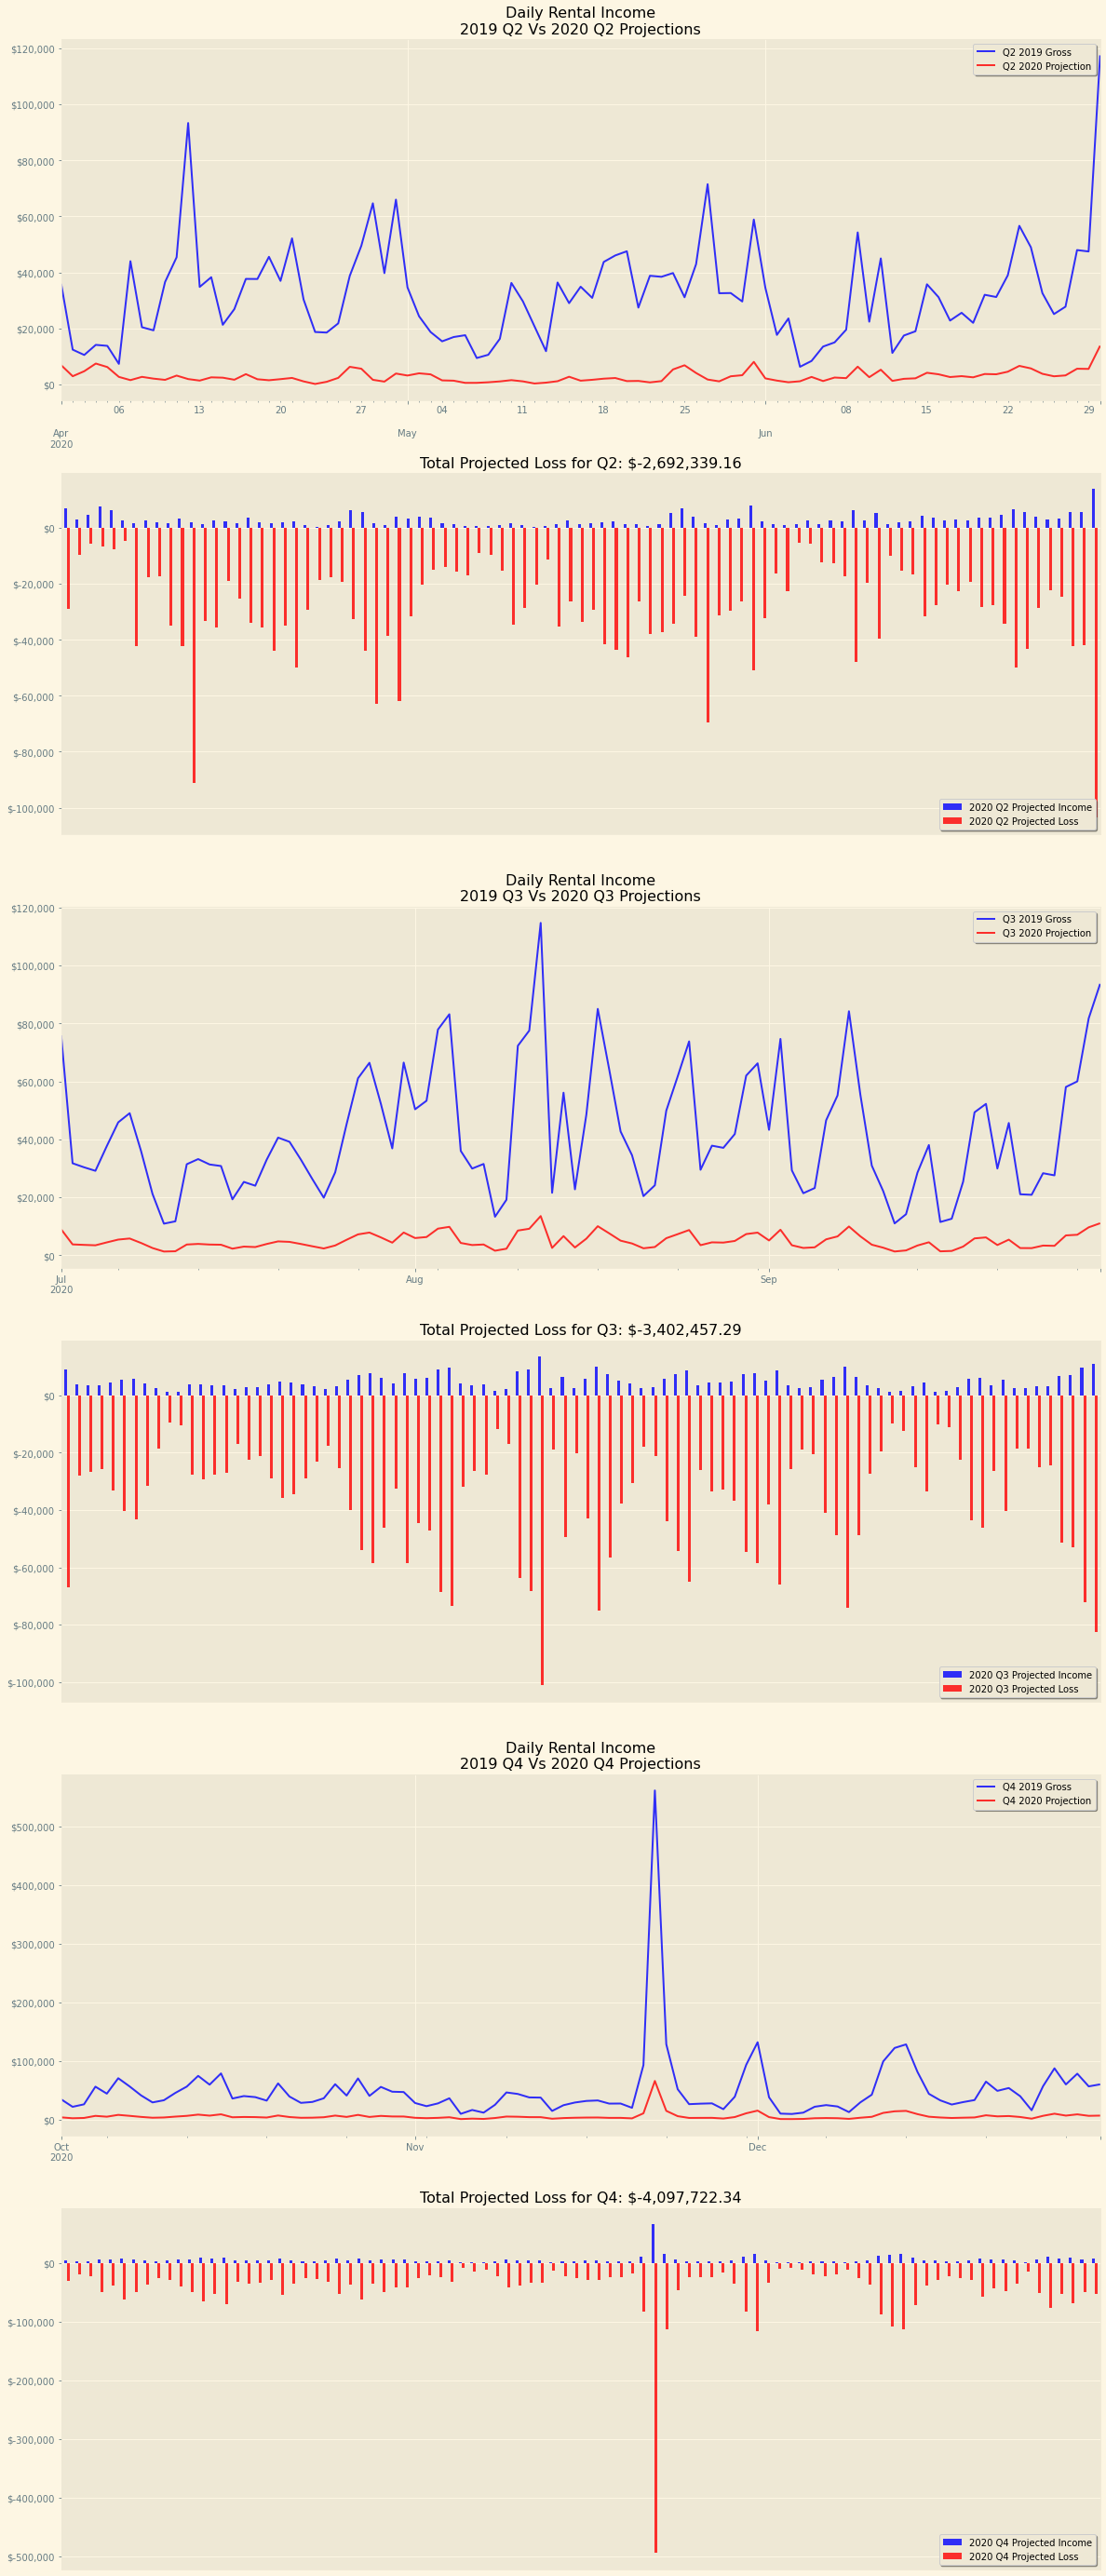

In [10]:
#Create figure
f, ax = plt.subplots(6,1,figsize = (20,50))

#Plot projections
for i, q in zip(list(np.arange(0,6,2)), np.arange(2,5)):
    loss_projections[['2019_Q2-Q4', '2020_projections']].loc[(loss_projections.quarter == q)].plot(alpha = .8, linewidth = 2,
        ax=ax[i], color = ['blue','red'])
    #Set ax[0]plot aesthetics
    ax[i].set_title('Daily Rental Income\n2019 Q{} Vs 2020 Q{} Projections'.format(q,q))
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
    ax[i].legend(['Q{} 2019 Gross'.format(q),'Q{} 2020 Projection'.format(q)],frameon = True, shadow=True)
    
    loss_projections.loc[(loss_projections.quarter == q)][['2020_projections','projected_loss']].plot(
        color = ['blue','red'], kind = 'bar', ax=ax[i + 1], alpha = .8)
    
    quarter_loss = np.sum(loss_projections.loc[(loss_projections.quarter == q)].projected_loss)
    
    #Set ax[1]plot aesthetics
    ax[i+1].set_title('Total Projected Loss for Q{}: ${:,}'.format(q,
                    round(quarter_loss,2)))
    ax[i+1].set_xlabel('')
    ax[i+1].tick_params(axis='x',  which='major',  bottom=False,  top=False,  labelbottom=False)
    ax[i+1].set_ylabel('')
    ax[i+1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
    ax[i+1].legend(['2020 Q{} Projected Income'.format(q),'2020 Q{} Projected Loss'.format(q)],frameon = True, shadow=True, loc = 'lower right')
    ax[i+1].grid(b = False, which = 'major', axis = 'x')
    
#Save to Visualizations file
plt.savefig(eda_path + '/quarter_projections.png', bbox_inches='tight')